In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


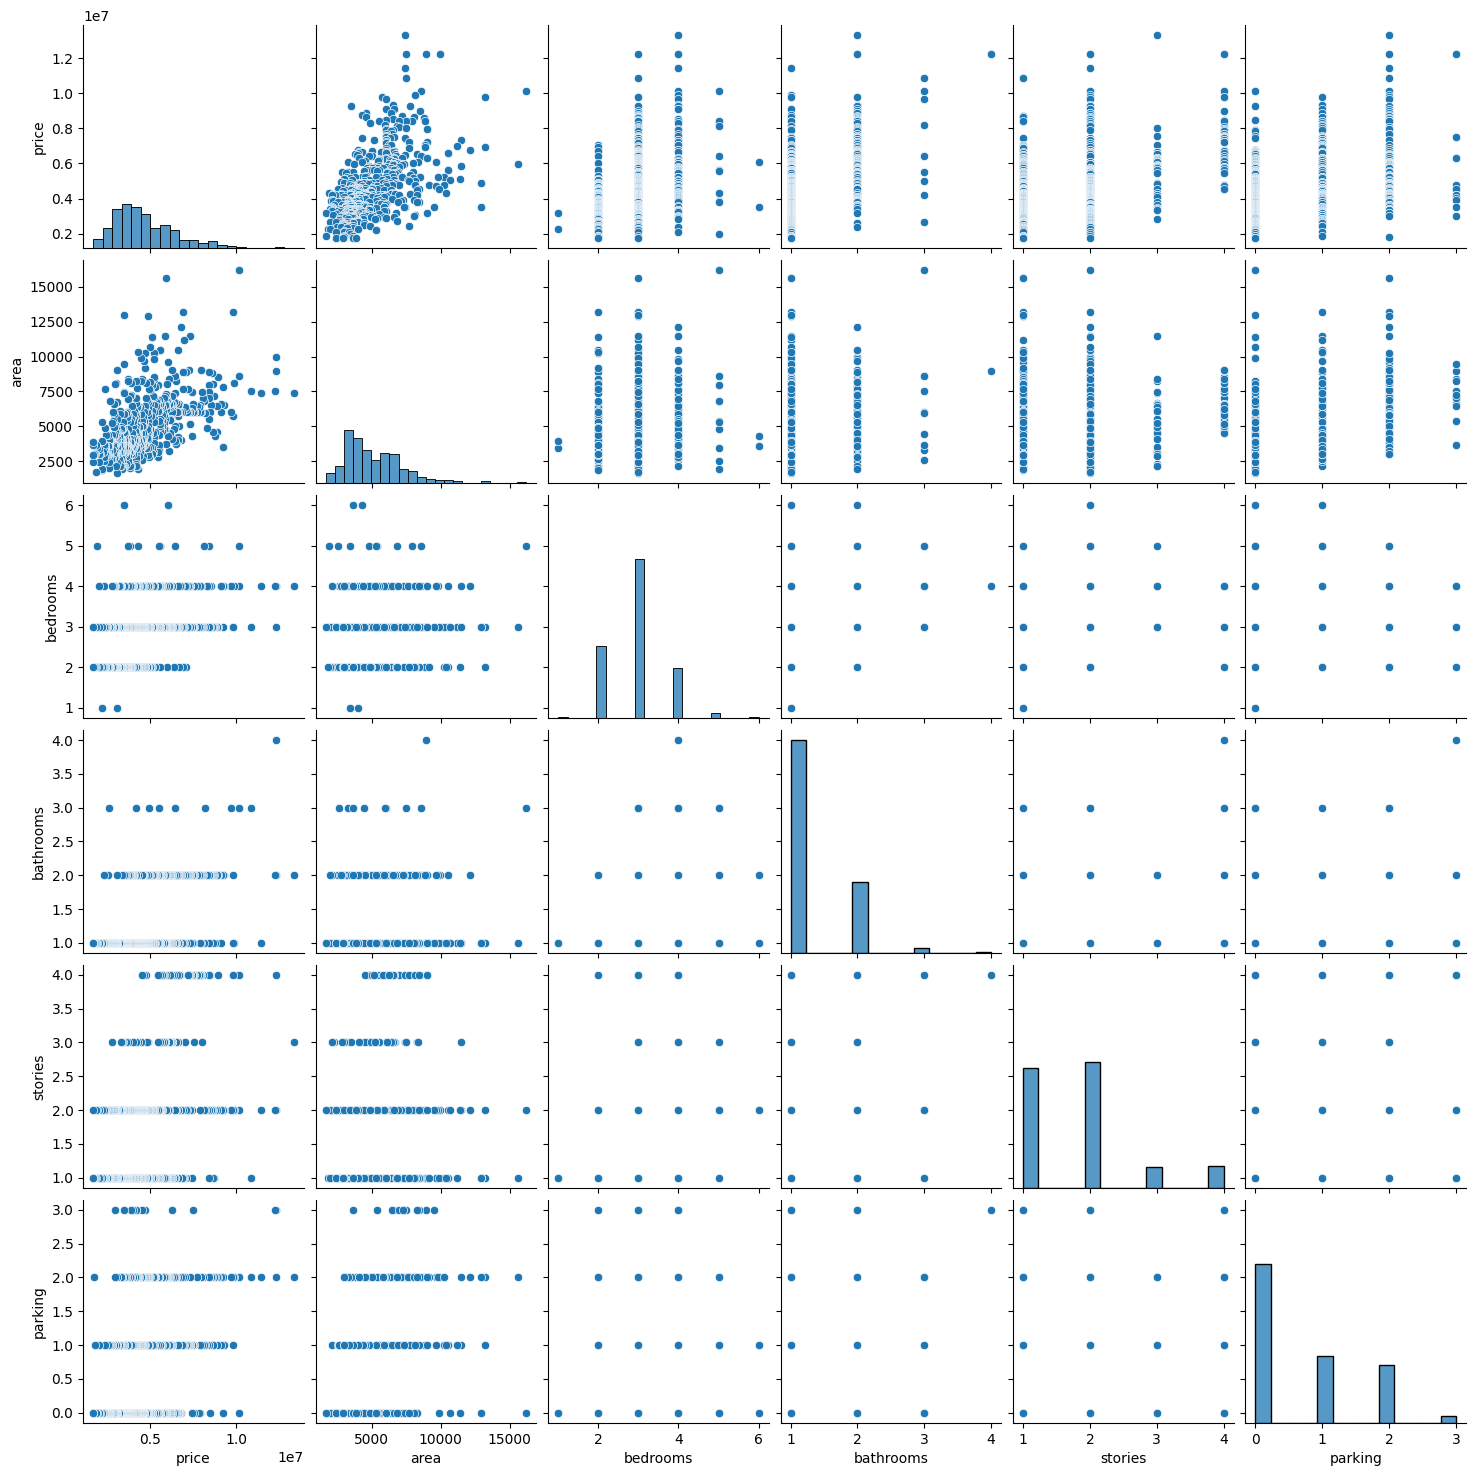

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['prefarea']=le.fit_transform(df['prefarea'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

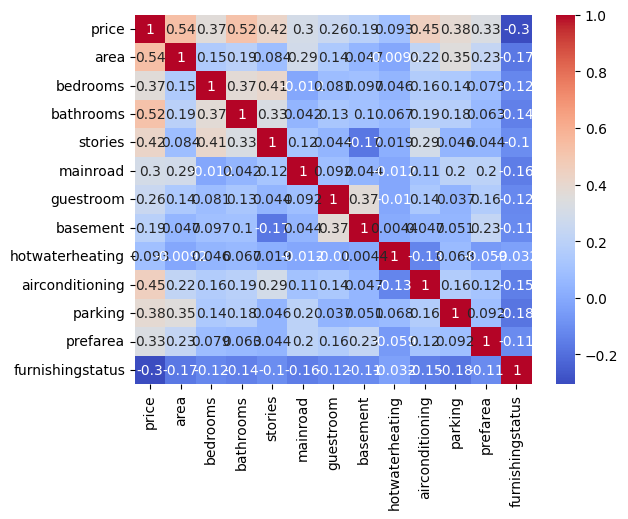

In [ ]:
corr_=df.corr()
sns.heatmap(corr_,annot=True,cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)
df

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.51769249,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  2.67940935,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  1.51769249,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.80574124,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.80574124,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.80574124,
        -0.55403469,  1.22296203]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df=mm.fit_transform(df)
df

array([[1.        , 0.39656357, 0.6       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.90909091, 0.5024055 , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.90909091, 0.57113402, 0.4       , ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.08659794, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15120275, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x=df[:,:-1]
y=df[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([0.55164499, 0.45410022, 0.56150897, 0.49160323, 0.70420244,
       0.47242608, 0.56593826, 0.69859161, 0.63393339, 0.37127174,
       0.47857251, 0.61796552, 0.62963864, 0.57601747, 0.59008582,
       0.72912997, 0.60304186, 0.64387552, 0.67526406, 0.53993464,
       0.52841563, 0.48493287, 0.47070648, 0.71335137, 0.506984  ,
       0.43540028, 0.44515469, 0.48297249, 0.55222983, 0.47789399,
       0.59180183, 0.6085922 , 0.41535689, 0.6428056 , 0.6497932 ,
       0.49757949, 0.22624892, 0.60635369, 0.71044361, 0.53371044,
       0.34198933, 0.62716284, 0.56276934, 0.64103999, 0.5631877 ,
       0.45479973, 0.46342364, 0.67843283, 0.54521262, 0.30359243,
       0.5827935 , 0.50549277, 0.67336664, 0.64559061, 0.63218221,
       0.58868531, 0.53407249, 0.46379238, 0.6471382 , 0.57154741,
       0.57476784, 0.47357513, 0.71665735, 0.43192627, 0.71745451,
       0.45737902, 0.22681308, 0.65826599, 0.57232787, 0.49204542,
       0.61311846, 0.43966926, 0.55426169, 0.4648282 , 0.56033

In [ ]:
from sklearn.feature_selection import RFE
lr=LinearRegression()
rfe=RFE(lr,n_features_to_select=10)
rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False  True  True False]
[1 1 1 1 1 1 1 1 2 1 1 3]


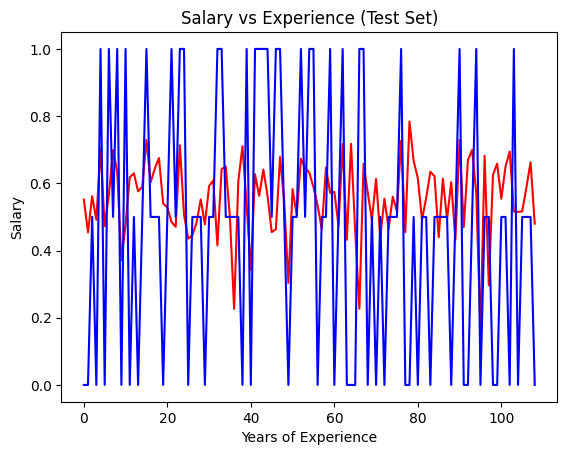

In [ ]:
plt.plot(y_pred,color='red')
plt.plot(y_test,color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()